In [15]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from skimage import io, data, transform
import requests
import os
import h5py

ModuleNotFoundError: No module named 'tensorflow.keras'

In [2]:
batch_size = 32 # You can try 64 or 128 if you'd like to
num_classes = 10
epochs = 100 # loss function value will be stabilized after 93rd epoch
# To save the model:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_fashion_mnist_trained_model.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# We need to reshape the data since the images in the dataset are grayscaled.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
input_shape = (28, 28, 1)

In [5]:
# We also need to convert the labels in the dataset into categorical matrix structure from 1-dim numpy array structure.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
# use the existing Inception model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)
base_model

In [20]:
# add a global spatial average pooling layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = tf.keras.layers.Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

# this is the model we will train
m = tf.keras.layers.Model(inputs=base_model.input, outputs=predictions)
m

AttributeError: module 'tensorflow.python.keras.layers' has no attribute 'Model'

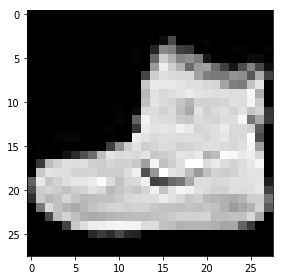

In [13]:
%matplotlib inline
img = x_train[0].reshape([28,28]) # reshape to display 28x28
io.imshow(img)

In [ ]:
classifier = tf.estimator.Estimator(model_fn=model)

In [ ]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])